# Abgabe 4

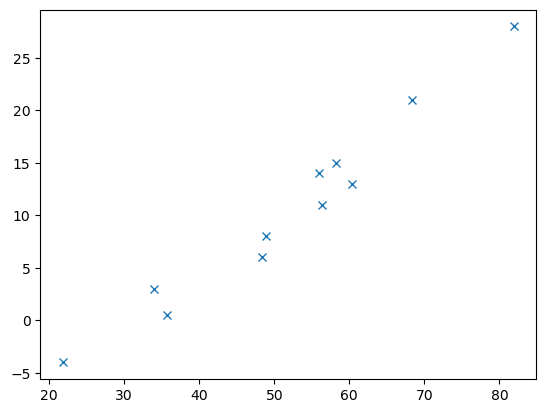

None
tensor([3.6181e+05, 2.3149e+07, 5.9642e+03])


In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
dir(optim)

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
np.savetxt("vl5_data.csv", np.c_[t_c, t_u])
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
plt.plot(t_u,t_c,'x')
plt.show()

t_un = 0.1 * t_u

params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

def model(t_u, w_1, w_2, b):
    return w_2 * t_u ** 2 + w_1 * t_u + b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

print(params.grad)

loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

print(params.grad)

def training_loop(n_epochs, optimizer, t_u, t_c):
    loss_new = []
    epoch_new = []
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_new.append(loss) 
        epoch_new.append(epoch)
        if epoch % 500 == 0 or epoch == 1:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params,loss_new,epoch_new

Neues Modell:

Epoch 1, Loss 675.794373
Epoch 500, Loss 2.782508
Epoch 1000, Loss 2.486026
Epoch 1500, Loss 2.261513
Epoch 2000, Loss 2.144078
Epoch 2500, Loss 2.101927
Epoch 3000, Loss 2.092149
Epoch 3500, Loss 2.090817
Epoch 4000, Loss 2.090723
Epoch 4500, Loss 2.090721
Epoch 5000, Loss 2.090721


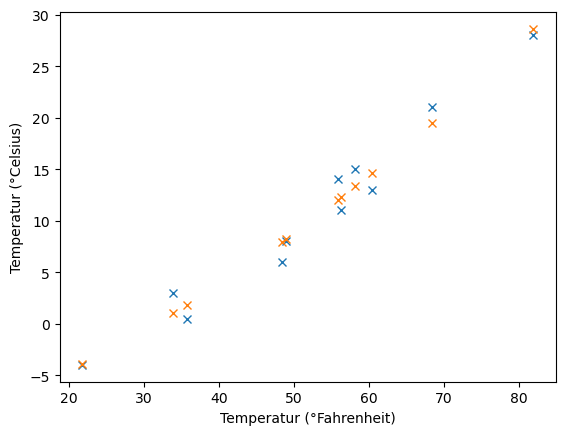

In [7]:
learning_rate = 1e-1
params = torch.tensor([1.0,1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()

params, loss_1, epoch_1 = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    t_u = t_un, 
    t_c = t_c)
plt.plot(t_u,t_c,'x')
t_p = model(t_un, params[0], params[1], params[2])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy(),'x')

plt.xlabel('Temperatur (°Fahrenheit)')
plt.ylabel('Temperatur (°Celsius)')
plt.show()

Altes Modell:

None
Epoch 1, Loss 80.364342
Epoch 500, Loss 2.962302
Epoch 1000, Loss 2.927647
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927646
Epoch 2500, Loss 2.927646
Epoch 3000, Loss 2.927646
Epoch 3500, Loss 2.927646
Epoch 4000, Loss 2.927646
Epoch 4500, Loss 2.927646
Epoch 5000, Loss 2.927645


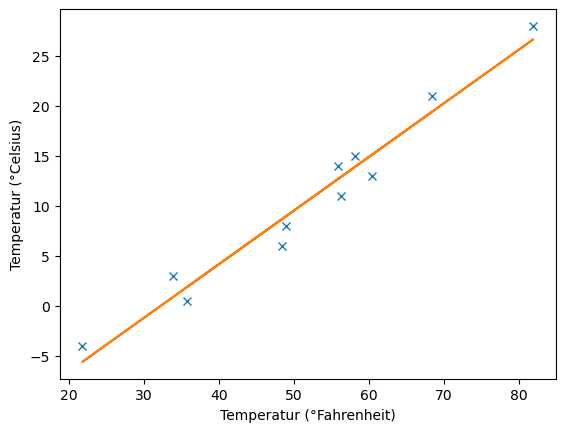

In [8]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

def model(t_u, w, b):
    return w*t_u+b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

print(params.grad)

loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

learning_rate = 1e-1
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()

params, loss_2, epoch_2 = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    t_u = t_un, 
    t_c = t_c)
plt.plot(t_u,t_c,'x')
t_p = model(t_un, params[0], params[1])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy())
plt.xlabel('Temperatur (°Fahrenheit)')
plt.ylabel('Temperatur (°Celsius)')
plt.show()

Vergleich des Losses der beiden Modelle

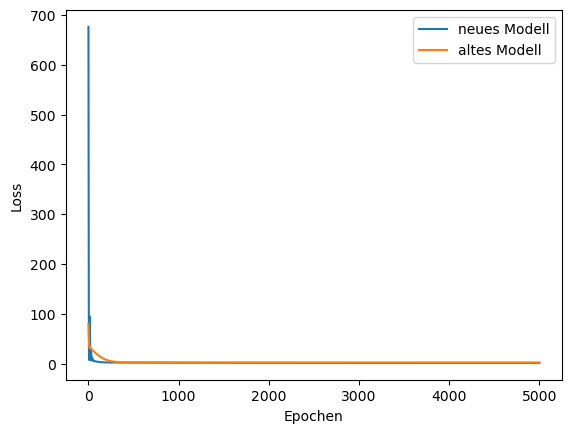

In [9]:
epoch_1 = torch.Tensor(epoch_1)
loss_1 = torch.Tensor(loss_1)
epoch_2 = torch.Tensor(epoch_2)
loss_2 = torch.Tensor(loss_2)

plt.plot(epoch_1,loss_1, label='neues Modell')
plt.plot(epoch_2,loss_2, label='altes Modell')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.legend()
plt.show()

Antworten auf die Fragen:

Frage 1: Ist der „Loss“ mit dem neuen Modell größer oder kleiner?

Der "Loss" ist von 2.927645 (altes Modell) auf 2.090721 (neues Modell) gesunken. Der Unterschied ist sehr gering. Das alte Modell beginnt zwar mit einem kleinerem "Loss", aber erziehlt erst nach dem "Loss" des neuen Modells einen geringen Wert.

Frage 2: Sieht das Ergebnis mit dem neuen Modell besser oder schlechter aus?

Das Ergebnis sieht mit dem neuen Modell besser aus, da sich die Punkte der Ausgleichsgerade noch besser den Messpunkten annähern. Das alte Modell hat durch die Linearität keine Möglichkeit, so ein Ergebnis zu erzielen.